# ***1) Delivery_time -> Predict delivery time using sorting time ***

In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




# **Upload Data (Delivery Time)**

In [4]:
from google.colab import files
uploaded = files.upload()


Saving delivery_time.csv to delivery_time.csv


In [6]:
del_time = pd.read_csv('delivery_time.csv')
del_time.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
del_time.shape

(21, 2)

# **EDA**

In [ ]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
del_time.isna().any()

Delivery_Time    False
Sorting_Time     False
dtype: bool

In [ ]:
del_time.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [ ]:
del_time[del_time.duplicated].value_counts()

Series([], dtype: int64)

In [ ]:
print(del_time.max())
print(del_time.min())

Delivery_Time    29.0
Sorting_Time     10.0
dtype: float64
Delivery_Time    8.0
Sorting_Time     2.0
dtype: float64


# **Visualization**

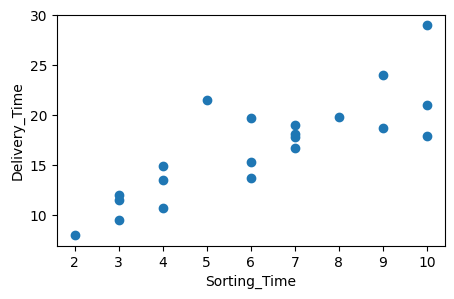

In [60]:
plt.figure(figsize = (5,3))
plt.scatter(del_time['Sorting_Time'], del_time['Delivery_Time'])
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()

<Axes: xlabel='Delivery_Time', ylabel='Density'>

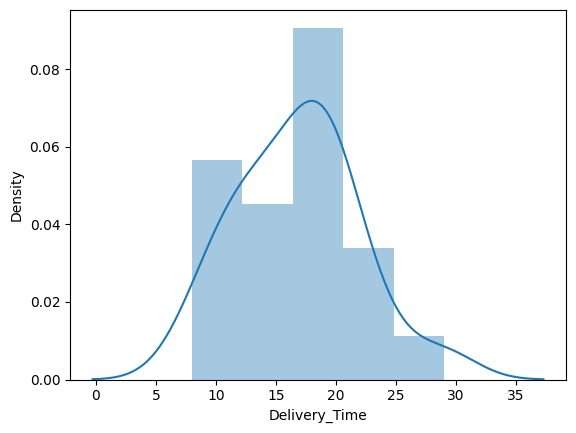

In [11]:
sns.distplot(del_time['Delivery_Time'])

<Axes: xlabel='Sorting_Time', ylabel='Density'>

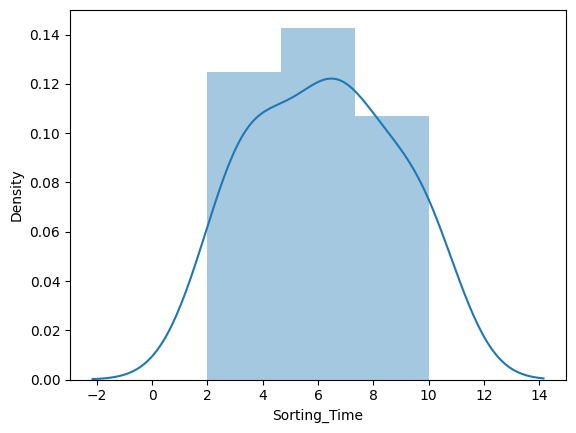

In [12]:
sns.distplot(del_time['Sorting_Time'])

In [13]:
del_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


# **SplIting into X and Y(Target)**

In [14]:
X = del_time['Sorting_Time'].values.reshape(21,1)
Y = del_time['Delivery_Time'].values.reshape(21,1)

In [15]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]])

In [16]:
Y


array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

# **SLR MODEL**

In [18]:
SLR = LinearRegression()
model = SLR.fit(X,Y)

In [19]:
model.intercept_

array([6.58273397])

In [20]:
model.coef_

array([[1.6490199]])

In [21]:
predictions = model.predict(X)
predictions

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [22]:
pd.DataFrame({'Sorting_Time':X.flatten(),
              'Delivery_Time':Y.flatten(),
              'Predictions':predictions.flatten()})

,Sorting_Time,Delivery_Time,Predictions
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# **Predictions Plot**

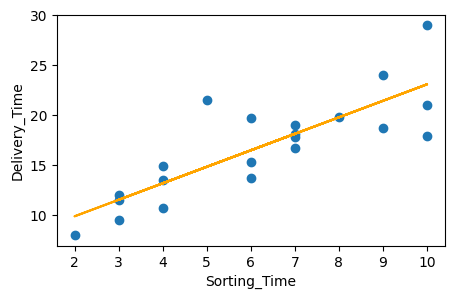

In [25]:
plt.figure(figsize = (5,3))
plt.scatter(del_time['Sorting_Time'], del_time['Delivery_Time'])
plt.plot(del_time['Sorting_Time'], predictions, color = 'orange')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

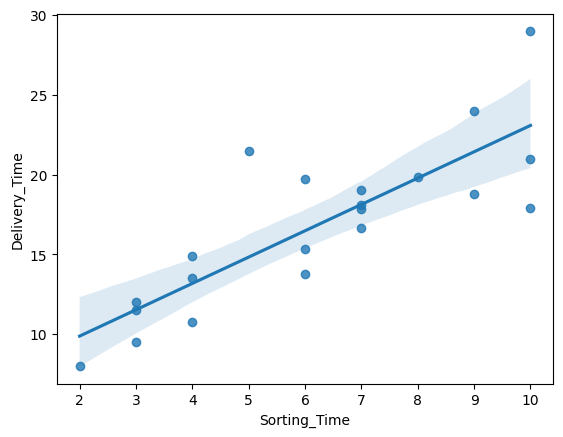

In [26]:
sns.regplot(x= del_time['Sorting_Time'],y=del_time['Delivery_Time'])

In [27]:
r2_score(del_time['Delivery_Time'], predictions)

0.6822714748417231

# **MODEL CREATION**

In [61]:
#Model Creation for the data
import statsmodels.formula.api as smf
model2= smf.ols('Delivery_Time ~ Sorting_Time' , data = del_time).fit()

# **MODEL PARAMETERS**

In [63]:
model2.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [64]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.98e-06
Time:                        18:46:10   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model2.predict(del_time['Sorting_Time'])

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

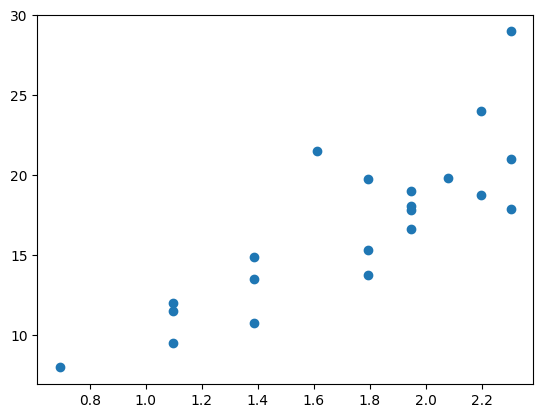

In [31]:
plt.scatter(np.log(del_time['Sorting_Time']),del_time['Delivery_Time'])

# **MODEL3 (log)**

In [33]:
model3= smf.ols('Delivery_Time ~ np.log(Sorting_Time)' , data = del_time).fit()

In [35]:
model3.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [36]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 25 May 2023   Prob (F-statistic):           2.64e-06
Time:                        18:18:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model2.predict(del_time['Sorting_Time'])

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

# **Model4 (log)(Target)**

In [38]:
model4= smf.ols('np.log(Delivery_Time) ~ Sorting_Time' , data = del_time).fit()


In [39]:
model4.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [41]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 25 May 2023   Prob (F-statistic):           1.59e-06
Time:                           18:22:50   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model4.predict(del_time['Sorting_Time'])

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

# **Model5 (Sqr)**

In [43]:
del_time['Sort_time_sqr'] = del_time['Sorting_Time']**2

model5 = smf.ols('np.log(Delivery_Time) ~ Sorting_Time + Sort_time_sqr', data = del_time).fit()
model5

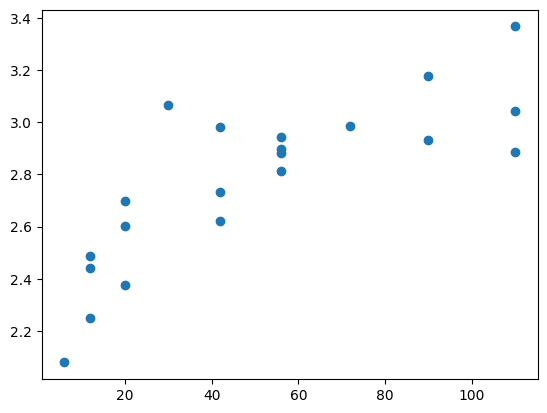

In [44]:
plt.scatter(del_time['Sorting_Time']+del_time['Sort_time_sqr'], np.log(del_time['Delivery_Time']))

In [45]:
model5.params

Intercept        1.699704
Sorting_Time     0.265922
Sort_time_sqr   -0.012841
dtype: float64

In [47]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 25 May 2023   Prob (F-statistic):           2.20e-06
Time:                           18:32:38   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time      0.2659      0.080      3.315      0.004       0.097       0.434
Sort_time_sqr    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
preds = model5.predict(del_time[['Sorting_Time','Sort_time_sqr']])
preds

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [51]:
preds = np.exp(preds)
preds

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [52]:
pd.DataFrame({'Sorting_Time':X.flatten(),
              'Delivery_Time':Y.flatten(),
              'Predictions 1': predictions.flatten(),
              'Predictions 5': preds})

,Sorting_Time,Delivery_Time,Predictions 1,Predictions 5
0,10,21.00,23.072933,21.646921
1,4,13.50,13.178814,12.909227
2,6,19.75,16.476853,16.995933
3,9,24.00,21.423913,21.176938
4,10,29.00,23.072933,21.646921
5,6,15.35,16.476853,16.995933
6,7,19.00,18.125873,18.764526
7,3,9.50,11.529794,10.825502
8,10,17.90,23.072933,21.646921
9,9,18.75,21.423913,21.176938


# **Residuals**

In [53]:
model5.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

# **Model6 (Reciprocal)**

In [54]:
del_time['sort_reci'] = 1/del_time['Sorting_Time']

In [56]:
model6 = smf.ols('np.log(Delivery_Time) ~ sort_reci',data = del_time).fit()
model6

In [57]:
model6.params

Intercept    3.302922
sort_reci   -2.660538
dtype: float64

In [58]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.764
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     61.53
Date:                   Thu, 25 May 2023   Prob (F-statistic):           2.24e-07
Time:                           18:42:25   Log-Likelihood:                 9.9235
No. Observations:                     21   AIC:                            -15.85
Df Residuals:                         19   BIC:                            -13.76
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3029      0.076     43.630      0.000       3.144       3.461
sort_reci     -2.6605      0.339     -7.844      0.000      -3.370      -1.951
==============================================================================
Omnibus:                        0.870   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.647   Jarque-Bera (JB):                0.532
Skew:                           0.380   Prob(JB):                        0.767
Kurtosis:                       2.825   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

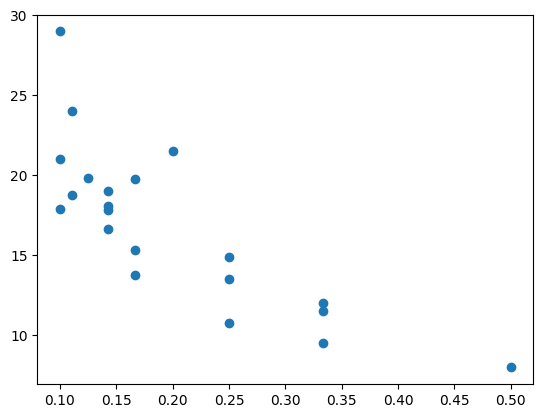

In [59]:
plt.scatter(del_time['sort_reci'], del_time['Delivery_Time'])

# **2) Salary_hike -> Build a prediction model for Salary_hike**

In [66]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [69]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [70]:
data.shape

(30, 2)

# **EDA**

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [72]:
data.isna().any()

YearsExperience    False
Salary             False
dtype: bool

In [73]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [74]:
data[data.duplicated].value_counts()

Series([], dtype: int64)

In [78]:
data = data.rename({'YearsExperience':'year_exp'},axis = 1)

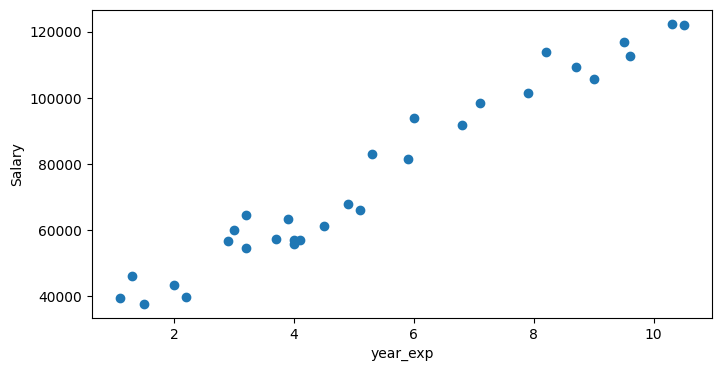

In [79]:
plt.figure(figsize = (8,4))
plt.scatter(data['year_exp'], data['Salary'])
plt.xlabel('year_exp')
plt.ylabel('Salary')
plt.show()

In [76]:
print(data.max())
print(data.min())

YearsExperience        10.5
Salary             122391.0
dtype: float64
YearsExperience        1.1
Salary             37731.0
dtype: float64


In [80]:
data.corr()

,year_exp,Salary
year_exp,1.000000,0.978242
Salary,0.978242,1.000000


# **VISUALIZATION** 

<Axes: xlabel='year_exp', ylabel='Salary'>

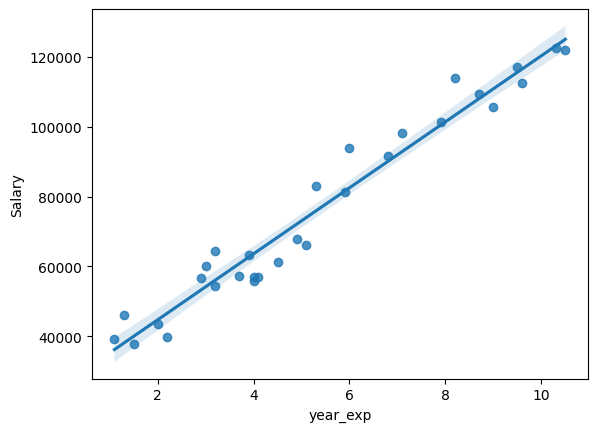

In [81]:
sns.regplot(x = data['year_exp'], y = data['Salary'])

<Axes: xlabel='Salary', ylabel='Density'>

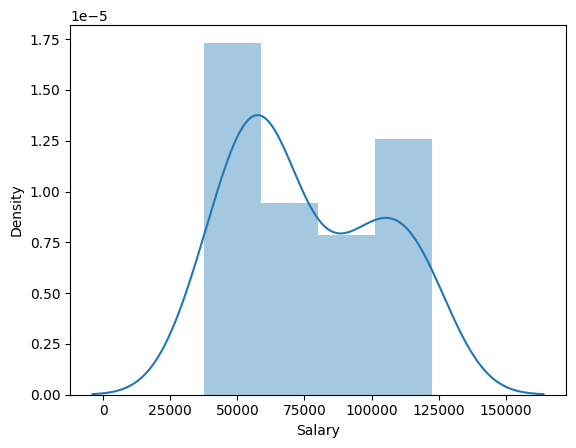

In [82]:
sns.distplot(data['Salary'])

<Axes: xlabel='year_exp', ylabel='Density'>

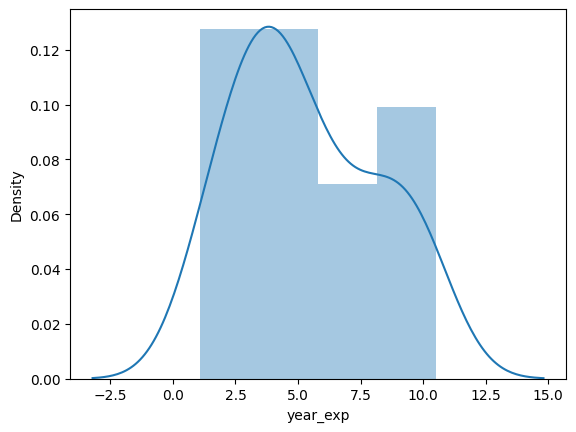

In [83]:
sns.distplot(data['year_exp'])

# **Spliting X1 and Y1(Target)**

In [88]:
X1 = data['year_exp'].values.reshape(30,1)
Y1 = data['Salary'].values.reshape(30,1)

In [89]:
X1

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [90]:
Y1

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

# **SLAR1 Model**

In [91]:
SLR1 = LinearRegression()
Model = SLR1.fit(X1,Y1)

In [94]:
Model.intercept_

array([25792.20019867])

In [101]:
Model.coef_

array([[9449.96232146]])

In [105]:
predictions1 = Model.predict(X1)
predictions1

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

In [106]:
pd.DataFrame({'year_exp':X1.flatten(),
              'Salary':Y1.flatten(),
              'Predictions':predictions1.flatten()})

,year_exp,Salary,Predictions
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


# **Prediction Plot**

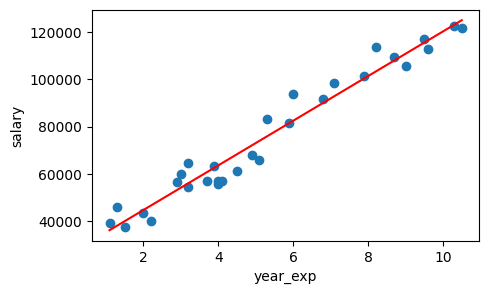

In [108]:
plt.figure(figsize = (5,3))
plt.scatter(data['year_exp'], data['Salary'])
plt.plot(data['year_exp'], predictions1, color = 'red')
plt.xlabel('year_exp')
plt.ylabel('salary')
plt.show()

In [109]:
r2_score(data['Salary'], predictions1)

0.9569566641435086

# **Model 2**

In [110]:
Model2 = smf.ols('Salary ~ year_exp', data = data).fit()
Model2

In [111]:
Model2.params

Intercept    25792.200199
year_exp      9449.962321
dtype: float64

In [112]:
Model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 25 May 2023   Prob (F-statistic):           1.14e-20
Time:                        19:15:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
year_exp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='year_exp', ylabel='Salary'>

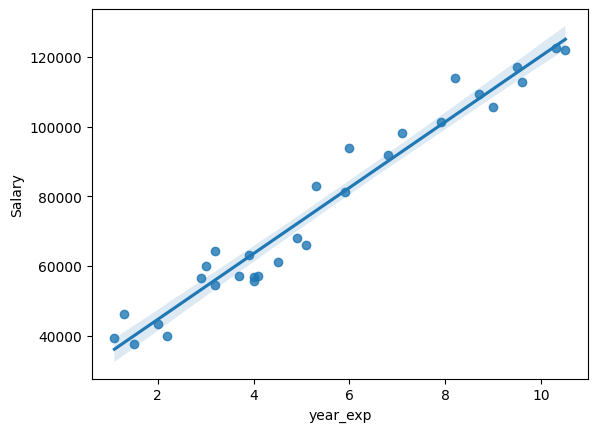

In [113]:
sns.regplot(x = 'year_exp', y = 'Salary', data = data)

In [114]:
Model2.predict(data['year_exp'])

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

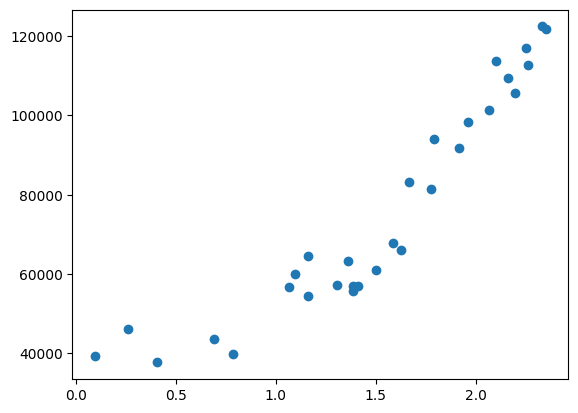

In [115]:
plt.scatter(np.log(data['year_exp']), data['Salary'])

# **Model3 (log)**

In [117]:
Model3 = smf.ols('Salary ~ np.log(year_exp)', data = data).fit()
Model3

In [118]:
Model3.params

Intercept           14927.97177
np.log(year_exp)    40581.98796
dtype: float64

In [119]:
Model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.25e-13
Time:                        19:20:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(year_exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
Model3.predict(data['year_exp'])

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

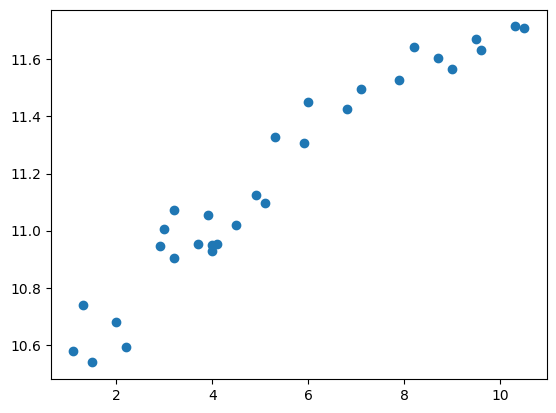

In [121]:
plt.scatter(data['year_exp'], np.log(data['Salary']))

# **Model4 (log)(Target)**

In [122]:
Model4 = smf.ols('np.log(Salary) ~ year_exp',data = data).fit()
Model4

In [123]:
Model4.params

Intercept    10.507402
year_exp      0.125453
dtype: float64

In [124]:
Model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 25 May 2023   Prob (F-statistic):           7.03e-18
Time:                        19:24:07   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
year_exp       0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
Model4.predict(data['year_exp'])

0     10.645400
1     10.670491
2     10.695581
3     10.758308
4     10.783398
5     10.871215
6     10.883761
7     10.908851
8     10.908851
9     10.971578
10    10.996668
11    11.009213
12    11.009213
13    11.021759
14    11.071940
15    11.122121
16    11.147212
17    11.172302
18    11.247574
19    11.260119
20    11.360482
21    11.398117
22    11.498480
23    11.536116
24    11.598842
25    11.636478
26    11.699204
27    11.711750
28    11.799567
29    11.824657
dtype: float64

# **Model5 (sqr)**

In [126]:
data['year_exp_Sqr'] = data['year_exp']**2
Model5 = smf.ols('np.log(Salary) ~ year_exp + year_exp_Sqr', data = data).fit()
Model5

In [127]:
Model5.params

Intercept       10.336852
year_exp         0.202382
year_exp_Sqr    -0.006614
dtype: float64

In [128]:
Model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 25 May 2023   Prob (F-statistic):           3.95e-18
Time:                        19:27:36   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.3369      0.067    154.368      0.000      10.199      10.474
year_exp         0.2024      0.027      7.601      0.000       0.148       0.257
year_exp_Sqr    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

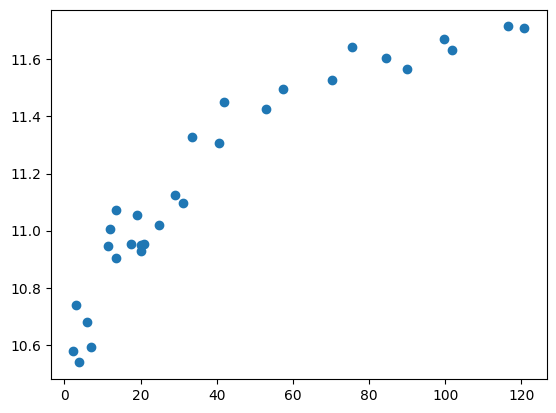

In [131]:
plt.scatter(data['year_exp']+data['year_exp_Sqr'], np.log(data['Salary']))

In [132]:
Preds = Model5.predict(data[['year_exp','year_exp_Sqr']])
Preds

0     10.551469
1     10.588771
2     10.625544
3     10.715161
4     10.750082
5     10.868138
6     10.884475
7     10.916750
8     10.916750
9     10.995124
10    11.025548
11    11.040561
12    11.040561
13    11.055443
14    11.113645
15    11.169730
16    11.196980
17    11.223700
18    11.300686
19    11.313054
20    11.407237
21    11.440373
22    11.522915
23    11.551686
24    11.596993
25    11.622589
26    11.662605
27    11.670211
28    11.719752
29    11.732716
dtype: float64

In [133]:
Preds = np.exp(Preds)
Preds

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64

In [134]:
pd.DataFrame({'year_exp':X1.flatten(),
              'Salary':Y1.flatten(),
              'Predictions 1': predictions1.flatten(),
              'Predictions 5': Preds})

,year_exp,Salary,Predictions 1,Predictions 5
0,1.1,39343.0,36187.158752,38233.559684
1,1.3,46205.0,38077.151217,39686.674746
2,1.5,37731.0,39967.143681,41173.227466
3,2.0,43525.0,44692.124842,45033.440973
4,2.2,39891.0,46582.117306,46633.832589
5,2.9,56642.0,53197.090931,52477.426306
6,3.0,60150.0,54142.087163,53341.747319
7,3.2,54445.0,56032.079627,55091.465477
8,3.2,64445.0,56032.079627,55091.465477
9,3.7,57189.0,60757.060788,59582.917523


# **Residuals**

In [135]:
Model5.resid

0     0.028604
1     0.152073
2    -0.087306
3    -0.034070
4    -0.156176
5     0.076368
6     0.120122
7    -0.011804
8     0.156817
9    -0.041007
10    0.028796
11   -0.111140
12   -0.090510
13   -0.103216
14   -0.093198
15   -0.043380
16   -0.099130
17    0.103956
18    0.005990
19    0.137358
20    0.019455
21    0.055132
22    0.002946
23    0.090617
24    0.006057
25   -0.055346
26    0.007059
27   -0.038304
28   -0.004776
29   -0.021989
dtype: float64

# **Model6 (Reciprocal)**

In [136]:
data['reci_year_exp'] = 1/data['year_exp']

Model6 = smf.ols("np.log(Salary) ~ reci_year_exp", data = data).fit()
Model6

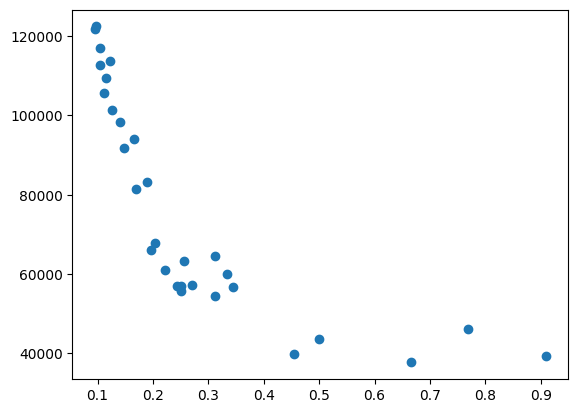

In [137]:
plt.scatter(data['reci_year_exp'], data['Salary'])

In [138]:
Model6.params

Intercept        11.584990
reci_year_exp    -1.506515
dtype: float64

In [139]:
Model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     61.60
Date:                Thu, 25 May 2023   Prob (F-statistic):           1.50e-08
Time:                        19:37:09   Log-Likelihood:                 5.3140
No. Observations:                  30   AIC:                            -6.628
Df Residuals:                      28   BIC:                            -3.826
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5850      0.065    178.556      0.000      11.452      11.718
reci_year_exp    -1.5065      0.192     -7.849      0.000      -1.900      -1.113
==============================================================================
Omnibus:                        8.949   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                2.329
Skew:                           0.141   Prob(JB):                        0.312
Kurtosis:                       1.665   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""